In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score


# Load the train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Function to preprocess the text data
def preprocess_text(text):
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the remaining words
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]
    
    return tokens


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score

# Load the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Define the topics to predict
topics = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the remaining words
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]
    return tokens

# Create the bag-of-words representation of the text
vectorizer = CountVectorizer(tokenizer=preprocess, max_features=1000)
X_train = vectorizer.fit_transform(df_train['TITLE'] + ' ' + df_train['ABSTRACT'])
X_test = vectorizer.transform(df_test['TITLE'] + ' ' + df_test['ABSTRACT'])

# Train the LDA model
lda = LatentDirichletAllocation(n_components=6, max_iter=10, learning_method='batch', random_state=42)
lda.fit(X_train)

# Predict the topics for the test data
y_pred = lda.transform(X_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score

# Load the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Define the topics to predict
topics = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the remaining words
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]
    return tokens

# Create the bag-of-words representation of the text
vectorizer = CountVectorizer(tokenizer=preprocess, max_features=1000)
X_train = vectorizer.fit_transform(df_train['TITLE'] + ' ' + df_train['ABSTRACT'])
X_test = vectorizer.transform(df_test['TITLE'] + ' ' + df_test['ABSTRACT'])

# Train the LDA model
lda = LatentDirichletAllocation(n_components=6, max_iter=10, learning_method='batch', random_state=42)
lda.fit(X_train)

# Predict the topics for the test data
y_pred = lda.transform(X_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# Apply the preprocessing function to the text columns of both datasets
# combine title and abstract columns
train_df['text'] = train_df['TITLE'] + train_df['ABSTRACT']
test_df['text'] = test_df['TITLE'] + test_df['ABSTRACT']

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

In [ ]:
train_df['ABSTRACT']

0        predict model allow subject-specif infer analy...
1        rotat invari translat invari great valu imag r...
2        introduc develop notion spheric polyharmon , n...
3        stochast landau -- lifshitz -- gilbert ( llg )...
4        fourier-transform infra-r ( ftir ) spectra sam...
                               ...                        
20967    machin learn find increasingli broad applic ph...
20968    polycrystallin diamond coat grown cement carbi...
20969    present new approach identifi situat behaviour...
20970    sum log-norm variat encount mani challeng appl...
20971    recent , option stop subject debat bayesian ps...
Name: ABSTRACT, Length: 20972, dtype: object

In [ ]:
import pandas as pd

train_df['text'] = train_df['TITLE'] + train_df['ABSTRACT']
test_df['text'] = test_df['TITLE'] + test_df['ABSTRACT']
# Calculate the number of articles in each dataset
num_train_articles = len(train_df['text'])
num_test_articles = len(test_df['text'])

# Calculate the total number of tokens in each dataset
train_token_counts = train_df['text'].apply(lambda x: len(x.split())).sum()
test_token_counts = test_df['text'].apply(lambda x: len(x.split())).sum()

# Calculate the average, minimum, and maximum number of tokens per article in each dataset
train_avg_tokens = train_token_counts / num_train_articles
test_avg_tokens = test_token_counts / num_test_articles
train_min_tokens = train_df['text'].apply(lambda x: len(x.split())).min()
test_min_tokens = test_df['text'].apply(lambda x: len(x.split())).min()
train_max_tokens = train_df['text'].apply(lambda x: len(x.split())).max()
test_max_tokens = test_df['text'].apply(lambda x: len(x.split())).max()

# Print the summary statistics in a table
print('| Dataset | Number of Articles | Number of Tokens | Average Tokens per Article | Minimum Tokens per Article | Maximum Tokens per Article |')
print('|---------|--------------------|------------------|----------------------------|----------------------------|-----------------------------|')
print(f'| Train   | {num_train_articles:11d}         | {train_token_counts:11d}      | {train_avg_tokens:26.0f} | {train_min_tokens:27d} | {train_max_tokens:27d} |')
print(f'| Test    | {num_test_articles:11d}         | {test_token_counts:11d}      | {test_avg_tokens:26.0f} | {test_min_tokens:27d} | {test_max_tokens:27d} |')

| Dataset | Number of Articles | Number of Tokens | Average Tokens per Article | Minimum Tokens per Article | Maximum Tokens per Article |
|---------|--------------------|------------------|----------------------------|----------------------------|-----------------------------|
| Train   |       20972         |     2541772      |                        121 |                           6 |                         583 |
| Test    |        8989         |     1094201      |                        122 |                           9 |                         599 |


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score

# Load the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Define the topics to predict
topics = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the remaining words
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]
    return tokens

# Create the bag-of-words representation of the text
vectorizer = CountVectorizer(tokenizer=preprocess, max_features=1000)
X_train = vectorizer.fit_transform(df_train['TITLE'] + ' ' + df_train['ABSTRACT'])
X_test = vectorizer.transform(df_test['TITLE'] + ' ' + df_test['ABSTRACT'])

# Train the LDA model
lda = LatentDirichletAllocation(n_components=6, max_iter=100, learning_method='batch', random_state=42)
lda.fit(X_train)

# Predict the topics for the test data
y_pred = lda.transform(X_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
y_predtopics = np.argmax(y_pred, axis=1)
y_preddist = pd.DataFrame(y_pred, columns=["Topic "+str(i) for i in range(1,7)])
y_preddist["Prediction"]=y_predtopics

In [ ]:
y = df_train.drop(["ID","TITLE","ABSTRACT"], axis=1)

In [ ]:
Actual_topics=y.idxmax(axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(Actual_topics)

Text(0.5, 1.0, '\nLDA\n')

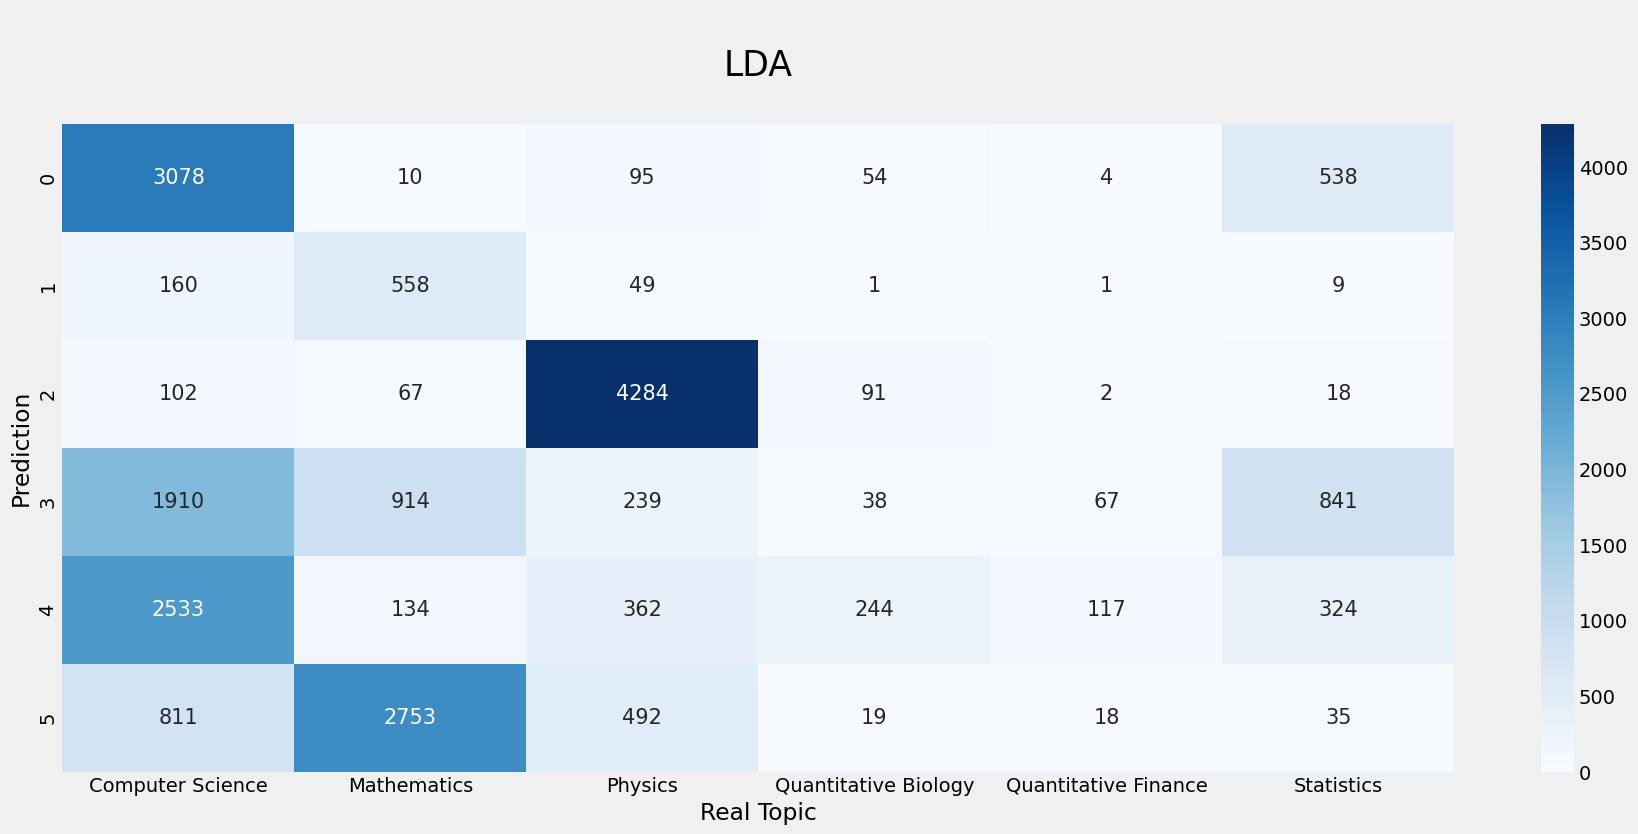

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(pd.crosstab(y_preddist["Prediction"], Actual_topics), annot=True, fmt="d", annot_kws={"fontsize":15}, cmap="Blues", vmin=0, ax=ax)
ax.set_xlabel("Real Topic")
ax.set_title("\nLDA\n", fontsize=25)

In [ ]:
# evaluate the model using perplexity
perplexity = lda.perplexity(X_train)
print(f"Perplexity: {perplexity}")


Perplexity: 539.548991167684


In [ ]:
# evaluate the model using perplexity
perplexity = lda.perplexity(X_test)
print(f"Perplexity: {perplexity}")

Perplexity: 548.101411715945


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import pyLDAvis

In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the dictionary for the coherence model
texts = [preprocess(doc) for doc in df_train['TITLE'] + ' ' + df_train['ABSTRACT']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(doc) for doc in texts]
# Train the LDA model
lda = LdaModel(corpus=corpus, num_topics=6, id2word=dictionary, passes=10)

# Evaluate the model using coherence
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence score: {coherence_score}")

# Visualize the topic distribution
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_topics.html')

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score

# Load the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Define the topics to predict
topics = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the remaining words
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]
    return tokens

# Create the bag-of-words representation of the text
vectorizer = CountVectorizer(tokenizer=preprocess, max_features=1000)
X_train = vectorizer.fit_transform(df_train['TITLE'] + ' ' + df_train['ABSTRACT'])
X_test = vectorizer.transform(df_test['TITLE'] + ' ' + df_test['ABSTRACT'])

# Train the LDA model
lda = LatentDirichletAllocation(n_components=6, max_iter=100, learning_method='batch', random_state=42)
lda.fit(X_train)

# Predict the topics for the test data
y_pred = lda.transform(X_train)
# evaluate the model using perplexity
perplexity = lda.perplexity(X_train)
print(f"Perplexity: {perplexity}")
# evaluate the model using perplexity
perplexity = lda.perplexity(X_test)
print(f"Perplexity: {perplexity}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Perplexity: 539.548991167684
Perplexity: 548.101411715945


In [ ]:
# Get the dictionary for the coherence model
texts = [preprocess(doc) for doc in df_train['TITLE'] + ' ' + df_train['ABSTRACT']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(doc) for doc in texts]
# Train the LDA model
lda = LdaModel(corpus=corpus, num_topics=6, id2word=dictionary, passes=100)

# Evaluate the model using coherence
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence score: {coherence_score}")

# Visualize the topic distribution
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_topics.html')

Coherence score: 0.5060609875160064


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score

# Load the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Define the topics to predict
topics = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the remaining words
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]
    return tokens

# Create the bag-of-words representation of the text
vectorizer = CountVectorizer(tokenizer=preprocess, max_features=1000)

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

<BarContainer object of 6 artists>

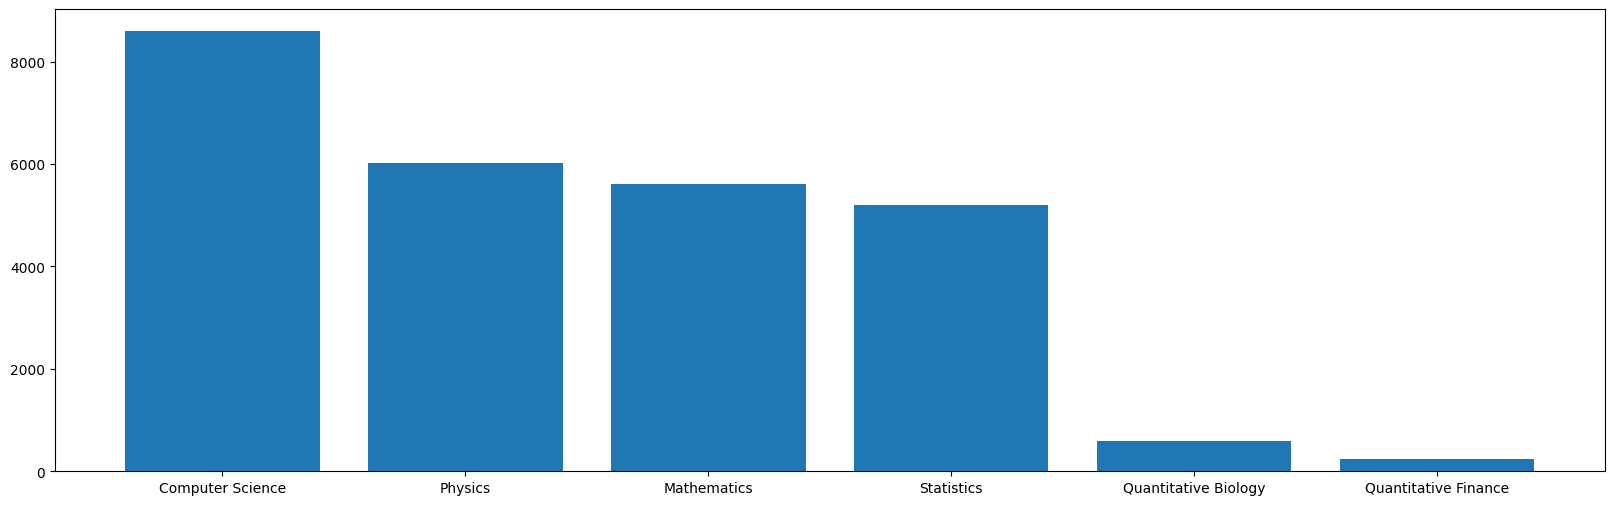

In [ ]:
Topics=["Computer Science","Physics","Mathematics","Statistics","Quantitative Biology","Quantitative Finance"]
Topics_count=[]
for i in Topics:
  Topics_count.append(df_train[i].sum())
plt.figure(figsize=(20,6))
plt.bar(Topics,Topics_count)

In [ ]:
y = df_train.drop(["ID","TITLE","ABSTRACT"], axis=1)
for i in range(y.shape[0]):
    if y.loc[i, "Statistics"]==1:
        y.loc[i, "Mathematics"]=1
y.drop(["Quantitative Finance", "Quantitative Biology", "Statistics"], axis=1, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score



# Define the topics to predict
topics = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the remaining words
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]
    return tokens

# Create the bag-of-words representation of the text
vectorizer = CountVectorizer(tokenizer=preprocess, max_features=1000)
X_train = vectorizer.fit_transform(df_train['TITLE'] + ' ' + df_train['ABSTRACT'])
X_test = vectorizer.transform(df_test['TITLE'] + ' ' + df_test['ABSTRACT'])

# Train the LDA model
lda = LatentDirichletAllocation(n_components=3, max_iter=100, learning_method='batch', random_state=42)
lda.fit(X_train)

# Predict the topics for the test data
y_pred = lda.transform(X_train)
y_predtopics = np.argmax(y_pred, axis=1)
y_preddist = pd.DataFrame(y_pred, columns=["Topic "+str(i) for i in range(1,4)])
y_preddist["Prediction"]=y_predtopics


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, '\nLDA\n')

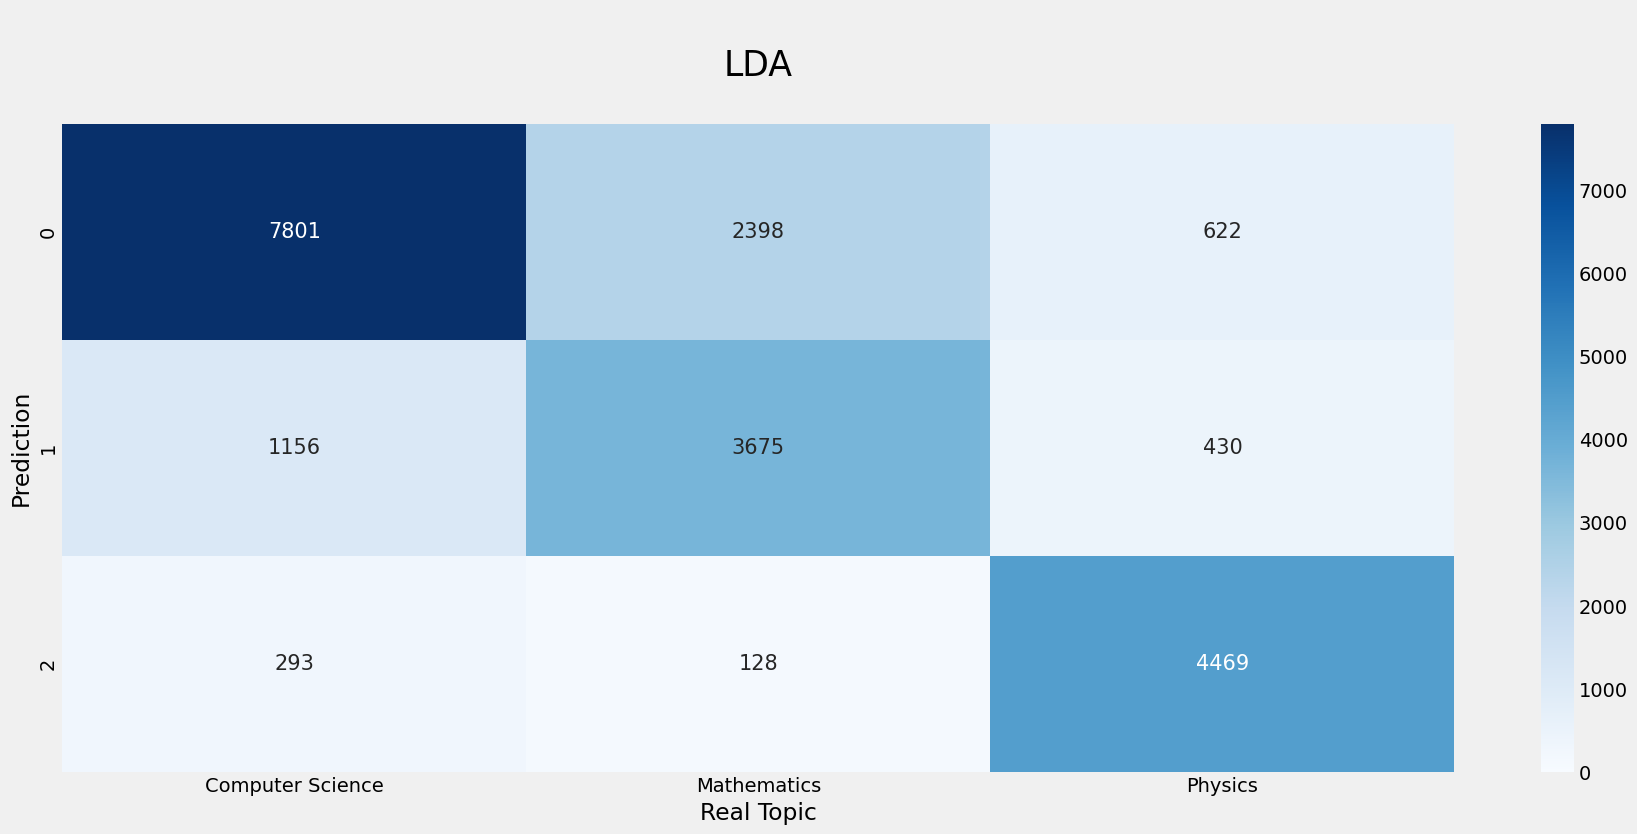

In [ ]:
Actual_topics=y.idxmax(axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(pd.crosstab(y_preddist["Prediction"], Actual_topics), annot=True, fmt="d", annot_kws={"fontsize":15}, cmap="Blues", vmin=0, ax=ax)
ax.set_xlabel("Real Topic")
ax.set_title("\nLDA\n", fontsize=25)

In [ ]:
# evaluate the model using perplexity
perplexity = lda.perplexity(X_train)
print(f"Perplexity: {perplexity}")

# evaluate the model using perplexity
perplexity = lda.perplexity(X_test)
print(f"Perplexity: {perplexity}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: 577.0581482717499
Perplexity: 580.577580077473


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.2 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score

# Define the topics to predict
topics = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the remaining words
    tokens = [stemmer.stem(word) for word in tokens if not word in stop_words]
    return tokens

# Create the TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=preprocess, max_features=1000)
X_train = vectorizer.fit_transform(df_train['TITLE'] + ' ' + df_train['ABSTRACT'])
X_test = vectorizer.transform(df_test['TITLE'] + ' ' + df_test['ABSTRACT'])

# Train the LDA model
lda = LatentDirichletAllocation(n_components=3, max_iter=100, learning_method='batch', random_state=42)
lda.fit(X_train)

# Predict the topics for the test data
y_pred = lda.transform(X_train)
y_predtopics = np.argmax(y_pred, axis=1)
y_preddist = pd.DataFrame(y_pred, columns=["Topic "+str(i) for i in range(1,4)])
y_preddist["Prediction"]=y_predtopics


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Text(0.5, 1.0, '\nLDA\n')

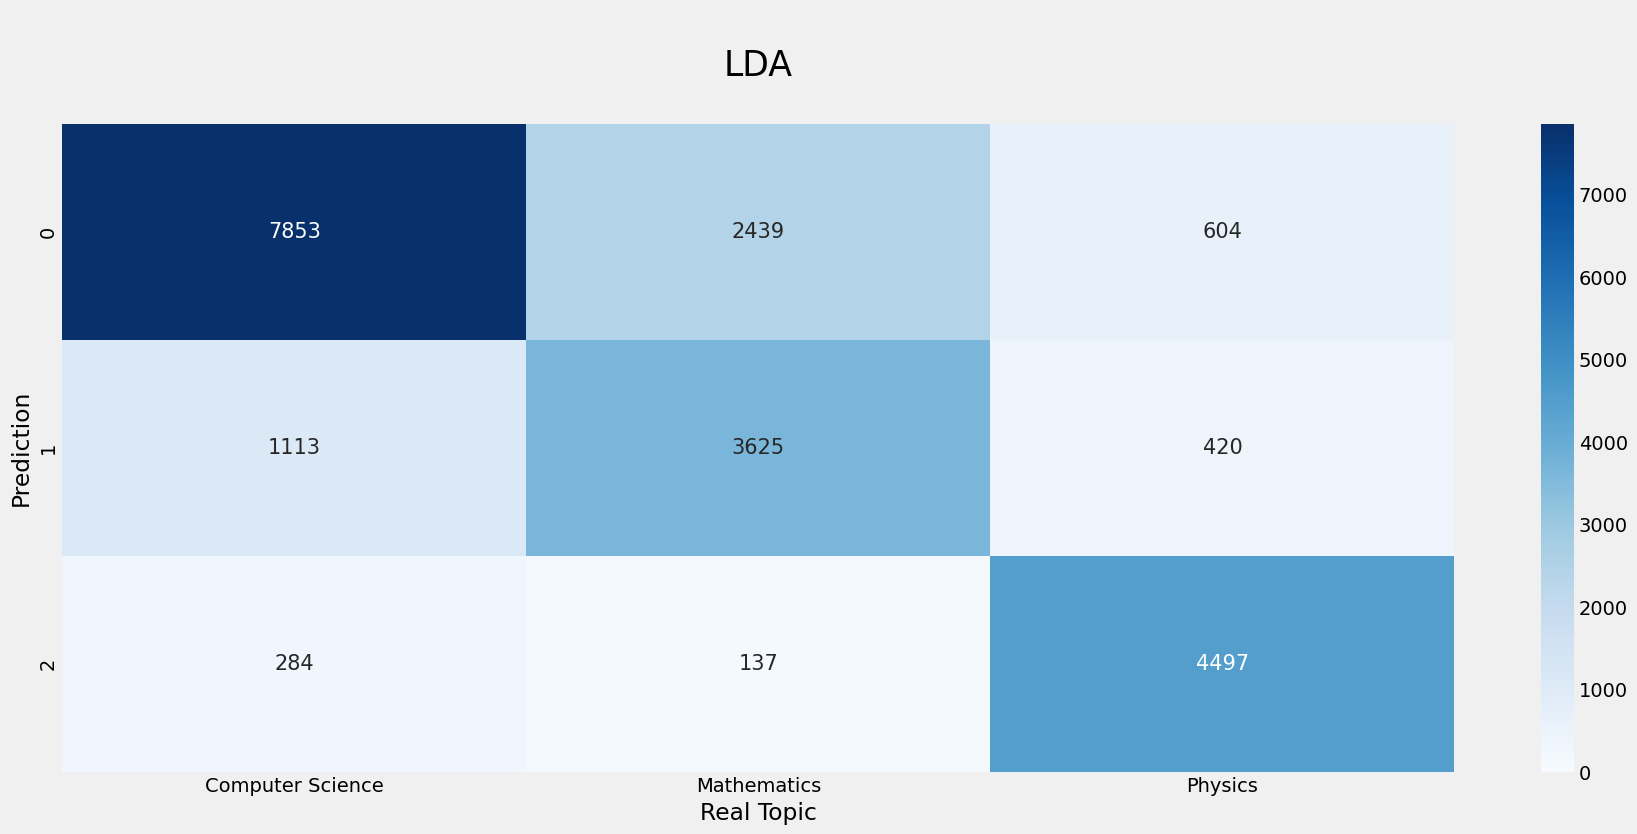

In [ ]:
Actual_topics=y.idxmax(axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(pd.crosstab(y_preddist["Prediction"], Actual_topics), annot=True, fmt="d", annot_kws={"fontsize":15}, cmap="Blues", vmin=0, ax=ax)
ax.set_xlabel("Real Topic")
ax.set_title("\nLDA\n", fontsize=25)

In [ ]:
# evaluate the model using perplexity
perplexity = lda.perplexity(X_train)
print(f"Perplexity: {perplexity}")

# evaluate the model using perplexity
perplexity = lda.perplexity(X_test)
print(f"Perplexity: {perplexity}")

Perplexity: 994.0652893722412
Perplexity: 1059.754185999533
